Project #  ***The Real Problem***

Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street level photographs are Google’s Street View imagery comprised of hundreds of millions of geo-located 360-degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the
location of the building it represents. More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colors, styles, orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, specularities, and
occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs.

In this project, we will use the dataset with images centered around a single digit (many of the images do contain some distractors at the sides. Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

The Street View House Numbers (SVHN) Dataset SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a
significantly harder, unsolved, real-world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

Link to the dataset:
https://drive.google.com/file/d/1L2-WXzguhUsCArrFUc8EEkXcj33pahoS/view?usp=sharing

![alt text](https://)

Acknowledgment for the datasets.
Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF
http://ufldl.stanford.edu/housenumbers as the URL for this site when necessary.

The objective of the project is to learn how to implement a simple image classification pipeline based on a deep neural network. The goals of this project are as follows:

1.  Understand the basic Image Classification pipeline and the data-driven approach
(train/predict stages)
2.  Data fetching and understand the train/test splits. (5 points)
3.  Implement and apply a deep neural network classifier including (15 points)
4.  Implement batch normalization for training the neural network (5 points)
5.  Print the classification accuracy metrics (10 points)

Happy Learning!

# Importing libraries


In [0]:
#Importing important libraries
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import imutils
import cv2
import sklearn

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the Dataset

<h3>2. Reshape & Normalization

First, I understood the train, validation and test shapes mentioned in the H5 file, then i find the small rectangular bounding box boundaries by visualizing the shapes which are cropped version of the original images to remove redundant information. Therefore, the size of images is reduced. After cropping, images are re-sized $32\times 32$ for computational convenience.

Second, unlike the MNIST dataset, the SVHN dataset comes from the real world image, which has 3 color channels. Our goal is to recognize the digits, so the color doesn't matter. so i converted the images to greyscale, then subtract the mean of each image and divide by its standard deviation. The image information is stored into numpy ndarray.</h3>

In [7]:
import h5py
import numpy as np
h5f = h5py.File('/content/drive/My Drive/Colab Notebook - AIML/Project 8 (Deep Neural )/SVHN_single_grey1.h5','r')
list(h5f.keys())



['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [8]:
X_test = h5f['X_test'][:]
X_train = h5f['X_train'][:]
X_val = h5f['X_val'][:]
y_test = h5f['y_test'][:]
y_train = h5f['y_train'][:]
y_val = h5f['y_val'][:]

# Close this file
h5f.close()

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 32, 32) (42000,)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 32, 32) (18000,)


In [9]:
print("training data points: {}".format(len(y_train)))
print("validation data points: {}".format(len(y_val)))
print("testing data points: {}".format(len(y_test)))

training data points: 42000
validation data points: 60000
testing data points: 18000


<h4>Visualizing the dataset</h4>

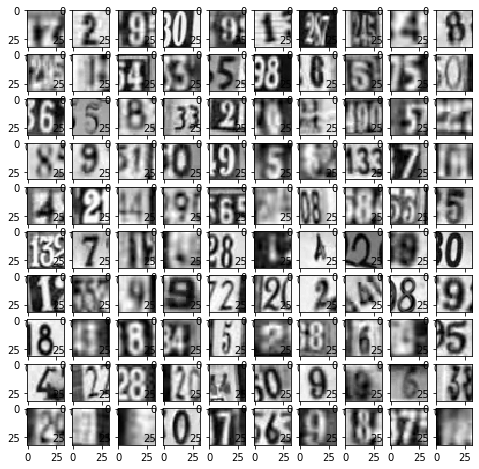

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = X_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

In [11]:
print(X_train.shape)


(42000, 32, 32)


In [12]:
print(y_train.shape)

(42000,)


In [0]:
#Represent Training & Testing samples suitable for #tensorflow backend
x_train=X_train.reshape(X_train.shape[0],1024).astype('float32')
x_test=X_test.reshape(X_test.shape[0],1024).astype('float32')
x_val=X_val.reshape(X_val.shape[0],1024).astype('float32')

x_train /= 255
x_test /= 255
x_val /= 255

In [14]:
x_train.shape

(42000, 1024)

In [0]:
#x_train = X_train[0:22000,:]
#y_train = y_train[0:22000]
#x_val = X_val[0:8000,:]
#y_val = y_val[0:8000]
#x_test = X_test[0:8000,:]
#y_test = y_test[0:8000]

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(42000, 1024)
(42000,)
(18000, 1024)
(18000,)


In [17]:
print(x_train.dtype)

float32


In [18]:
print(x_train.shape)

(42000, 1024)


In [0]:
#%tensorflow_version 2.x

In [20]:
from keras.utils import np_utils
#Encoding the output class label (One-Hot Encoding)
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)
y_val=np_utils.to_categorical(y_val,10)


Using TensorFlow backend.


In [21]:
y_val[2]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Implementing the DNN

In [0]:
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout
from keras import optimizers
from keras.utils import np_utils
import tensorflow as tf

In [23]:
##Initialize the Artificial Neural Network Classifier

keras_model1 = Sequential()

In [24]:
#Adding Input layer and activation functions ReLU
keras_model1.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding Activation function
keras_model1.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model1.add(Dense(256, kernel_initializer='he_normal'))
#Adding Activation function
keras_model1.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model1.add(Dense(128, kernel_initializer='he_normal'))
#Adding Activation function
keras_model1.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model1.add(Dense(64, kernel_initializer='he_normal'))
#Adding Activation function
keras_model1.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model1.add(Dense(32, kernel_initializer='he_normal'))
#Adding Activation function
keras_model1.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes
keras_model1.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model1.add(Activation('softmax'))

In [25]:
keras_model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

# Implementing ANN using SGD optimizer, categorical crossentropy loss function and Accuracy metric for monitoring


There are many techniques for refinement and many hyper-parameters need to be tuned. To do a grid search on deep neural network will cost huge amount of effort and time. The refinement approach I adopted is observing the loss and accuracy on validation set and then decide which approach may improve the accuracy on test dataset.



In [26]:
# compiling the ANN classifier
keras_model1.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [27]:
# Fitting the ANN to the Training data
history1 = keras_model1.fit(x_train, y_train, validation_data=(x_val,y_val),batch_size = 1000, epochs = 100, verbose = 1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 42000 samples, validate on 60000 samples
Epoch 1/100





42000/42000 [==============================] - 10s 245us/step - loss: 2.3196 - acc: 0.1138 - val_loss: 2.3002 - val_acc: 0.1230
Epoch 2/100
42000/42000 [==============================] - 1s 12us/step - loss: 2.2958 - acc: 0.1317 - val_loss: 2.2918 - val_acc: 0.1348
Epoch 3/100
42000/42000 [==============================] - 0s 11us/step - loss: 2.2879 - acc: 0.1460 - val_loss: 2.2836 - val_acc: 0.1565
Epoch 4/100
42000/42000 [==============================] - 1s 12us/step - loss: 2.2800 - acc: 0.1623 - val_loss: 2.2763 - val_acc: 0.1569
Epoch 5/100
42000/42000 [==============================] - 0s 12us/step - loss: 2.2717 - acc: 0.1706 - val_loss: 2.2672 - val_acc: 0.1789
Epoch 6/100
42000/42000 [==============================] - 1s 12us/step - loss: 2.2631 - acc: 0.1887 - val_loss: 2.2582 - val_acc: 0.1905
Epoch 7/100
42000/

In [28]:
results_1 = keras_model1.evaluate(x_val, y_val)
print('SGD optimizer, categorical crossentropy loss function and accuracy metric: ', results_1[1])

60000/60000 [==============================] - 2s 41us/step
SGD optimizer, categorical crossentropy loss function and accuracy metric:  0.71285


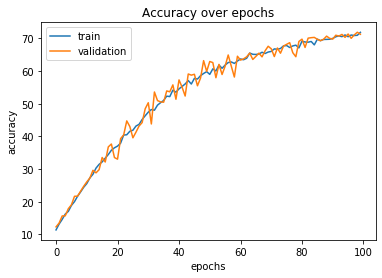

In [29]:
plt.plot(np.array(history1.history['acc']) * 100)
plt.plot(np.array(history1.history['val_acc']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

# Tunning the learning rate and decay in sgd

In [0]:
sgd = optimizers.sgd(lr = 0.0001)

In [31]:
# compiling the ANN classifier
keras_model1.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history2 = keras_model1.fit(x_train, y_train, validation_data=(x_val,y_val),batch_size = 200, epochs = 30, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/30
42000/42000 [==============================] - 2s 40us/step - loss: 0.8823 - acc: 0.7347 - val_loss: 0.8891 - val_acc: 0.7331
Epoch 2/30
42000/42000 [==============================] - 1s 33us/step - loss: 0.8758 - acc: 0.7380 - val_loss: 0.8885 - val_acc: 0.7333
Epoch 3/30
42000/42000 [==============================] - 1s 35us/step - loss: 0.8752 - acc: 0.7380 - val_loss: 0.8881 - val_acc: 0.7336
Epoch 4/30
42000/42000 [==============================] - 2s 37us/step - loss: 0.8747 - acc: 0.7381 - val_loss: 0.8877 - val_acc: 0.7338
Epoch 5/30
42000/42000 [==============================] - 2s 36us/step - loss: 0.8743 - acc: 0.7385 - val_loss: 0.8875 - val_acc: 0.7340
Epoch 6/30
42000/42000 [==============================] - 2s 38us/step - loss: 0.8740 - acc: 0.7390 - val_loss: 0.8871 - val_acc: 0.7342
Epoch 7/30
42000/42000 [==============================] - 2s 36us/step - loss: 0.8737 - acc: 0.7388 - val_loss: 0.8868 - val_acc

In [32]:
results_2 = keras_model1.evaluate(x_val, y_val)
print('Val_acc after changing learning rate and decay in SGD: ', results_2[1])

60000/60000 [==============================] - 2s 42us/step
Val_acc after changing learning rate and decay in SGD:  0.7356833333333334


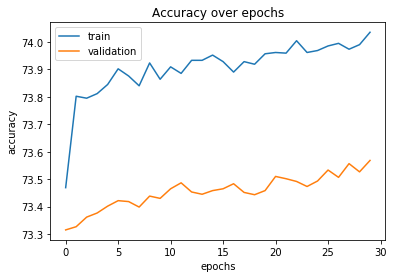

In [33]:
plt.plot(np.array(history2.history['acc']) * 100)
plt.plot(np.array(history2.history['val_acc']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

# Implementing (vectorized) backpropagation (Adam optimizer, cross entropy loss, cost functions)

In [0]:
#Initialize the Artificial Neural Network Classifier
keras_model_3 = Sequential()

In [35]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_3.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_3.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_3.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_3.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_3.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_3.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_3.add(Activation('softmax'))

In [36]:
keras_model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_8 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)              

In [0]:
#Setting the learning rate in sgd
sgd = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_3.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [38]:
# Fitting the ANN to the Training data
history3 = keras_model_3.fit(x_train, y_train, validation_data=(x_val,y_val),batch_size = 1000, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 2s 47us/step - loss: 2.3790 - acc: 0.1554 - val_loss: 2.3104 - val_acc: 0.1718
Epoch 2/100
42000/42000 [==============================] - 1s 23us/step - loss: 2.0008 - acc: 0.2958 - val_loss: 2.0669 - val_acc: 0.2718
Epoch 3/100
42000/42000 [==============================] - 1s 23us/step - loss: 1.7564 - acc: 0.4175 - val_loss: 1.8562 - val_acc: 0.3733
Epoch 4/100
42000/42000 [==============================] - 1s 22us/step - loss: 1.5740 - acc: 0.5152 - val_loss: 1.7324 - val_acc: 0.4300
Epoch 5/100
42000/42000 [==============================] - 1s 22us/step - loss: 1.4293 - acc: 0.5866 - val_loss: 1.6039 - val_acc: 0.5043
Epoch 6/100
42000/42000 [==============================] - 1s 21us/step - loss: 1.3118 - acc: 0.6371 - val_loss: 1.4943 - val_acc: 0.5471
Epoch 7/100
42000/42000 [==============================] - 1s 23us/step - loss: 1.2152 - acc: 0.6728 - val_loss: 1.4104 - 

In [39]:
results_3 = keras_model_3.evaluate(x_val, y_val)
print('Val_acc using sgd, cross entropy, cost function : ', results_3[1])

60000/60000 [==============================] - 4s 70us/step
Val_acc using sgd, cross entropy, cost function :  0.9043333333333333


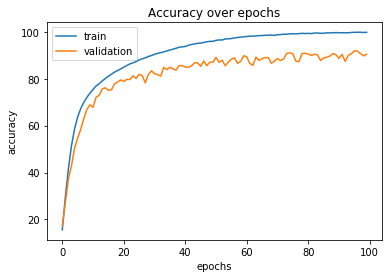

In [40]:
plt.plot(np.array(history3.history['acc']) * 100)
plt.plot(np.array(history3.history['val_acc']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

Adam Optimization
Adam is a method for efficient stochastic optimization that only requires first-order gradients with little memory requirement. The method computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients. Adam combines the advantages of two popular methods: AdaGrad , which works well with sparse gradients, and RMSProp, which works well in on-line and non-stationary settings. Some of Adam’s advantages are that the magnitudes of parameter updates are invariant to rescaling of the gradient, its stepsizes are approximately bounded by the stepsize hyper-parameter, it does not require a stationary objective, it works with sparse gradients, and it naturally performs a form of step size annealing.

# Implementing batch normalization and Dropout for training the neural network

In [0]:
##Initialize the Artificial Neural Network Classifier
keras_model_4 = Sequential()

In [42]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_4.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_4.add(BatchNormalization())
#Adding Activation function
keras_model_4.add(Activation('relu'))
#Adding Dropout Layer
keras_model_4.add(Dropout(0.2))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_4.add(Dense(256,kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_4.add(BatchNormalization())
#Adding Activation function
keras_model_4.add(Activation('relu'))
#Adding Dropout Layer
keras_model_4.add(Dropout(0.2))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_4.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_4.add(BatchNormalization())
#Adding Activation function
keras_model_4.add(Activation('relu'))
#Adding Dropout Layer
keras_model_4.add(Dropout(0.2))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_4.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_4.add(BatchNormalization())
#Adding Activation function
keras_model_4.add(Activation('relu'))
#Adding Dropout Layer
keras_model_4.add(Dropout(0.2))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_4.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_4.add(BatchNormalization())
#Adding Activation function
keras_model_4.add(Activation('relu'))
#Adding Dropout Layer
keras_model_4.add(Dropout(0.2))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_4.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_4.add(Activation('softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [43]:
keras_model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
activation_13 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
activation_14 (Activation)   (None, 256)              

In [0]:
#Setting the learning rate in SGD
sgd = optimizers.adam(lr = 0.001)
# compiling the ANN classifier
keras_model_4.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [45]:
# Fitting the ANN to the Training data
history4 = keras_model_4.fit(x_train, y_train, validation_data=(x_val,y_val),batch_size = 100, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 8s 202us/step - loss: 2.0192 - acc: 0.2722 - val_loss: 1.9203 - val_acc: 0.3447
Epoch 2/100
42000/42000 [==============================] - 7s 168us/step - loss: 1.4528 - acc: 0.5064 - val_loss: 1.4886 - val_acc: 0.4888
Epoch 3/100
42000/42000 [==============================] - 7s 172us/step - loss: 1.2290 - acc: 0.6037 - val_loss: 1.3551 - val_acc: 0.5487
Epoch 4/100
42000/42000 [==============================] - 7s 165us/step - loss: 1.0952 - acc: 0.6552 - val_loss: 1.1037 - val_acc: 0.6428
Epoch 5/100
42000/42000 [==============================] - 7s 159us/step - loss: 0.9944 - acc: 0.6914 - val_loss: 1.0519 - val_acc: 0.6637
Epoch 6/100
42000/42000 [==============================] - 8s 179us/step - loss: 0.9293 - acc: 0.7151 - val_loss: 1.0700 - val_acc: 0.6494
Epoch 7/100
42000/42000 [==============================] - 7s 166us/step - loss: 0.8871 - acc: 0.7307 - val_loss: 0.

In [46]:
results_4 = keras_model_4.evaluate(x_val, y_val)
print('Val_acc using sgd, cross entropy, cost function, batch normalization and drop out : ', results_4[1])

60000/60000 [==============================] - 4s 68us/step
Val_acc using sgd, cross entropy, cost function, batch normalization and drop out :  0.8225833333333333


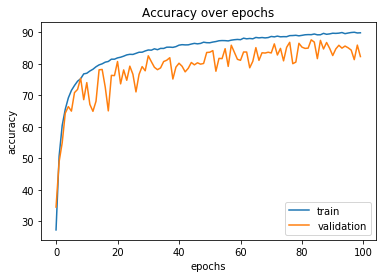

In [47]:
plt.plot(np.array(history4.history['acc']) * 100)
plt.plot(np.array(history4.history['val_acc']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

"Dropout" consists of setting to zero the output of each hidden neuron with probability 0.2. The neurons which are “dropped out” in this way do not contribute to the forward pass and do not participate in back-propagation. So every time an input is presented, the neural network samples a different architecture, but all these architectures share weights. This technique reduces complex co-adaptations of neurons, since a neuron cannot rely on the presence of particular other neurons. It is, therefore, forced to learn more robust features that are useful in conjunction with many different random subsets of the other neurons.

Without dropout, my network exhibits substantial overfitting. Applying dropout gives me roughly 5% accuracy improvement on character-level recognition and 7% improvement on sequence-level recognition.



# Testing NN on test data on Model_4 with hypertuning

In [48]:
# Fitting the ANN to the test data
history_final = keras_model_4.fit(x_train, y_train, validation_data=(x_test,y_test),batch_size = 100, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 6s 136us/step - loss: 0.3322 - acc: 0.8976 - val_loss: 0.5683 - val_acc: 0.8280
Epoch 2/100
42000/42000 [==============================] - 6s 143us/step - loss: 0.3312 - acc: 0.9000 - val_loss: 0.5688 - val_acc: 0.8315
Epoch 3/100
42000/42000 [==============================] - 6s 137us/step - loss: 0.3297 - acc: 0.9012 - val_loss: 0.5482 - val_acc: 0.8386
Epoch 4/100
42000/42000 [==============================] - 6s 138us/step - loss: 0.3255 - acc: 0.9020 - val_loss: 0.6119 - val_acc: 0.8106
Epoch 5/100
42000/42000 [==============================] - 6s 132us/step - loss: 0.3194 - acc: 0.9038 - val_loss: 0.6297 - val_acc: 0.8012
Epoch 6/100
42000/42000 [==============================] - 6s 136us/step - loss: 0.3187 - acc: 0.9032 - val_loss: 0.5746 - val_acc: 0.8247
Epoch 7/100
42000/42000 [==============================] - 6s 145us/step - loss: 0.3212 - acc: 0.9017 - val_loss: 0.

In [49]:
results_final = keras_model_4.evaluate(x_test, y_test)
print('Final Test accuracy : ', results_final[1])

18000/18000 [==============================] - 1s 65us/step
Final Test accuracy :  0.8347777777777777


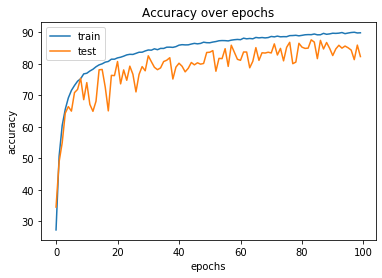

In [50]:
plt.plot(np.array(history4.history['acc']) * 100)
plt.plot(np.array(history4.history['val_acc']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.title('Accuracy over epochs')
plt.show()

In [0]:
#Store the accuracy results for each model in a dataframe for final comparison
#results1 = pd.DataFrame({'Model':['Using sgd optimizer, categorical crossentropy loss function and Accuracy metric'], 'Accuracy': result_1[1],index={'1'})
#results2 = pd.DataFrame({'Model':['Val_acc after changing learning rate and decay in SGD'], 'Accuracy': result_2[1]},index={'2'})
#results3 = pd.DataFrame({'Model':['Test'], 'Accuracy': result_3[1]},index={'3'})
#results4 = pd.DataFrame({'Model':['Final Test Accuracy'], 'Accuracy': results_final[1]]},index={'4'})
#results= pd.concat([results1, results2, results3,results4])
#results = results[['Model', 'Accuracy']]
#results

**Predicting the digits using NN classifier on test data**

**Image 1**

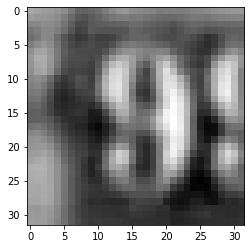

In [52]:
#Showing the image
plt.imshow(x_test[5].reshape(32,32),cmap='gray')

In [53]:
#Predicting the digits
keras_model_4.predict_classes(x_test)[5]

9

**Image 2**

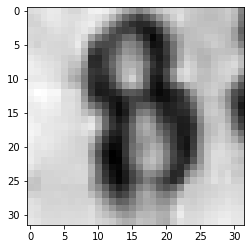

In [54]:
#Showing the image
plt.imshow(x_test[10].reshape(32,32),cmap='gray')

In [55]:
#Predicting the digits
keras_model_4.predict_classes(x_test)[10]

8

**Image 3**

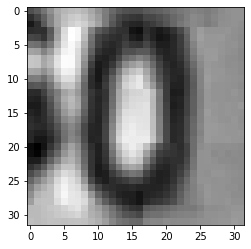

In [56]:
#Showing the image
plt.imshow(X_test[34].reshape(32,32),cmap='gray')

In [57]:
#Predicting the digits
keras_model_4.predict_classes(x_test)[34]

0

In [0]:
y_predict = keras_model_4.predict(x_test)

In [59]:
y_predict[0]

array([0.16536476, 0.12824945, 0.03238088, 0.03666312, 0.1113087 ,
       0.0528994 , 0.18094295, 0.06426533, 0.14287253, 0.08505283],
      dtype=float32)

In [60]:
np.argmax(y_predict[0])

6

In [61]:
y_test[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [62]:
rounded_predictions = keras_model_4.predict_classes(x_test, batch_size=128, verbose=0)
rounded_predictions[1]

7

In [63]:
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

7

In [0]:
from sklearn import metrics

In [65]:
cm = metrics.confusion_matrix(rounded_labels,rounded_predictions)
print(cm)

[[1447   18   27   25   44   10   48   40   99   56]
 [  15 1448   46   38   77   16   16  106   47   19]
 [   7    8 1565   31   28   14    5   83   32   30]
 [   6    9   36 1419   22  103   20   33   55   16]
 [   9   23   62   22 1563   18   19   18   61   17]
 [   7    4   16   83   19 1520   40   12   44   23]
 [  20    7   19   25   29   84 1421   15  202   10]
 [   9   24   27   20   20    9    8 1663   16   12]
 [  13   19   25   53   27   30   64   14 1528   39]
 [  40    9   32   31   44   52   21   35   88 1452]]


In [66]:
cr=metrics.classification_report(rounded_labels,rounded_predictions)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.80      0.85      1814
           1       0.92      0.79      0.85      1828
           2       0.84      0.87      0.86      1803
           3       0.81      0.83      0.82      1719
           4       0.83      0.86      0.85      1812
           5       0.82      0.86      0.84      1768
           6       0.85      0.78      0.81      1832
           7       0.82      0.92      0.87      1808
           8       0.70      0.84      0.77      1812
           9       0.87      0.80      0.83      1804

    accuracy                           0.83     18000
   macro avg       0.84      0.83      0.84     18000
weighted avg       0.84      0.83      0.84     18000



Hypertuning : 

I've mainly adjusted the model in 3 ways:

1. Add/remove one layer
2. Increase/decrease the number of hidden units
3. Change the probability in dropout

Benchmark : Human performance on recognition reaches 98%.And the state-of-art of transcription accuracy is 96.03%. The model is built by Goodefellow $et\ al$. Their model also achieves a character-level accuracy of 97.84%. However, the parameters of their model is so large that it took them 6 days to train the model.

Apparently, the google colab infra setup  I use couldn't bear such computational task and the number of parameters must be reduced due to the 8G RAM. The threshold I set for this project is to reach 80% -85% accuracy on sequence transcription and 90% accuracy on character-level recognition on which level people may find it useful when transcribing the digits automatically.

1. Model Accuracy

*  Base model(Model_1): Train acc:	71 %	and Validation Acc : 71 %
*  Model_2: Train acc:	71 %	and Validation Acc: 71 %
*  Model_3:	Train acc: 99 %	and validation Acc: 90 % ( overfit)
*  Model_4	Train Acc : 92 % and validation Acc : 84 % ( Epochs=92)

On comparing these four models, one can notice that whenever we change the dropout value or add a dropout layer, there will be a leaping growth on final accuracy and the difference between train and test acc will be small. 


2. Justification
The best model I built so far reaches test accuracy of 85 %, while the human's performance on this dataset reaches 98% accuracy. Comparing to threshold this is not accurate enough for transcribing sequence digits in real world. However, I think this approach using Deep Learning menthod is an exploratory approach to recognizing single digit in real world and can be enhanced with CNN.

